## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
unique_counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
column_name = 'ASK_AMT'
max = application_df[column_name].max()
min = application_df[column_name].min()
column_range = application_df[column_name].max() - application_df[column_name].min()

print(f"Min for {column_name}: {min}")
print(f"Max for {column_name}: {max}")
print(f"Range for {column_name}: {column_range}")

Min for ASK_AMT: 5000
Max for ASK_AMT: 8597806340
Range for ASK_AMT: 8597801340


In [8]:
application_df = application_df.sort_values(by='IS_SUCCESSFUL', ascending=False)
application_df.head(50)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
5118,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1
5109,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
5111,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1
5112,T8,Independent,C1000,Other,Association,1,0,N,5000,1
5113,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1
5115,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1
5117,T3,Independent,C1000,Preservation,Trust,1,0,N,5000,1
5120,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
5107,T3,Independent,C2000,Preservation,Trust,1,0,N,5000,1


In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 1000
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() <= cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C4500        1
C1900        1
C2570        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [12]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_reduced = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1]
classification_counts_reduced

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1600        5
C1257        5
C1260        3
C0           3
C2710        3
C1234        2
C1256        2
C1246        2
C1267        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1880
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() <= cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [83]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS'])
df_dummies

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5118,1,5000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5109,1,5000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5111,1,5000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5112,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,1,5000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7761,1,5000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7758,1,5000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7754,1,5000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [84]:
df_dummies.drop(columns=['STATUS','AFFILIATION_Family/Parent','AFFILIATION_National','AFFILIATION_Other','AFFILIATION_Regional','SPECIAL_CONSIDERATIONS_N','SPECIAL_CONSIDERATIONS_Y','CLASSIFICATION_Other','APPLICATION_TYPE_Other','ASK_AMT'], inplace=True)

In [61]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34299 entries, 0 to 34298
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   IS_SUCCESSFUL                 34299 non-null  int64
 2   APPLICATION_TYPE_T19          34299 non-null  uint8
 3   APPLICATION_TYPE_T3           34299 non-null  uint8
 4   APPLICATION_TYPE_T4           34299 non-null  uint8
 5   APPLICATION_TYPE_T5           34299 non-null  uint8
 6   APPLICATION_TYPE_T6           34299 non-null  uint8
 7   AFFILIATION_CompanySponsored  34299 non-null  uint8
 8   AFFILIATION_Independent       34299 non-null  uint8
 9   CLASSIFICATION_C1000          34299 non-null  uint8
 10  CLASSIFICATION_C1200          34299 non-null  uint8
 11  CLASSIFICATION_C2000          34299 non-null  uint8
 12  CLASSIFICATION_C2100          34299 non-null  uint8
 13  CLASSIFICATION_C3000          3

In [85]:
# Split our preprocessed data into our features and target arrays
y = df_dummies.IS_SUCCESSFUL.values
X = df_dummies.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [86]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [87]:
X_train_scaled
X_train_scaled[:5]

array([[-0.1753079 ,  0.5178119 , -0.21711361, -0.18974939, -0.19324006,
        -0.91848672,  0.924473  ,  0.99171524, -0.40747959, -0.46479543,
        -0.24153572, -0.24342285, -0.10376034, -0.06642414, -0.01079982,
         0.46998167, -0.44575245, -0.65324821, -0.12030512, -0.03416998,
         0.67738878,  0.6413368 , -0.14587657, -0.12599811, -0.32947563,
        -0.08557282, -0.17186198, -0.35416385, -0.06401969, -0.07476688],
       [-0.1753079 , -1.93120322, -0.21711361, -0.18974939, -0.19324006,
        -0.91848672,  0.924473  ,  0.99171524, -0.40747959, -0.46479543,
        -0.24153572, -0.24342285, -0.10376034, -0.06642414, -0.01079982,
         0.46998167, -0.44575245,  1.5308117 , -0.12030512, -0.03416998,
        -1.47625711,  0.6413368 , -0.14587657, -0.12599811, -0.32947563,
        -0.08557282, -0.17186198, -0.35416385, -0.06401969, -0.07476688],
       [-0.1753079 ,  0.5178119 , -0.21711361, -0.18974939, -0.19324006,
        -0.91848672,  0.924473  , -1.00835397, -0

## Compile, Train and Evaluate the Model

In [88]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath='AlphabetSoupCharityCallbacks.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=30))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 200)               6200      
                                                                 
 dense_40 (Dense)            (None, 150)               30150     
                                                                 
 dense_41 (Dense)            (None, 1)                 151       
                                                                 
Total params: 36501 (142.58 KB)
Trainable params: 36501 (142.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [90]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5722 - accuracy: 0.7191
Epoch 2/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5604 - accuracy: 0.7283
Epoch 3/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5579 - accuracy: 0.7290
Epoch 4/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7308
Epoch 5/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7315
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7319
Epoch 7/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7313
Epoch 8/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7322
Epoch 9/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.7336
Epoch 10/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accura

In [91]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5795 - accuracy: 0.7328 - 481ms/epoch - 2ms/step
Loss: 0.5794532895088196, Accuracy: 0.7328279614448547


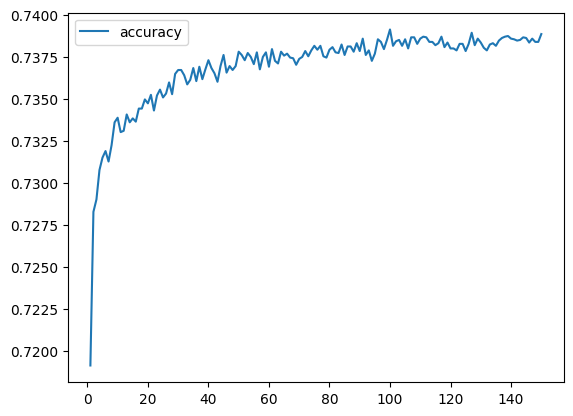

In [92]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

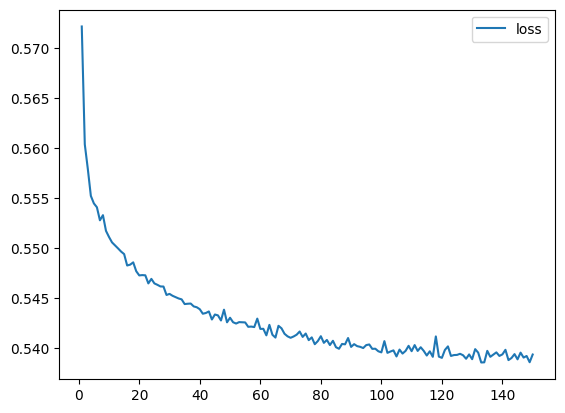

In [93]:
history_df.plot(y="loss")
plt.show()

In [ ]:
# import shap
# import numpy as np

# num_features = 40

# explainer = shap.Explainer(nn, masker=shap.maskers.Independent(X_train_scaled))
# shap_values = explainer.shap_values(X_train_scaled)

# shap.summary_plot(shap_values, X_train_scaled, feature_names=[f'Feature {i+1}' for i in range(num_features)])
# plt.show()



In [94]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1.Overview

The purpose of this analysis is to try to optimize a model for the Alphabet Soup Foundation to select applicants with the best chance for success in their ventures using various features of the applicant. The model uses the following variables:

2.Results



> Data Preprocessing
*   Target variable - "IS_SUCCESSFUL" which indicates that a venture was successful "1" or not successful "0"
*   Feature variables - feature variables were created from string variables by using the get_dummies function. I then dropped variables in an attempt to optimize the model which resulted in the following feature variables:

  >>>>APPLICATION_TYPE_T19, APPLICATION_TYPE_T3, APPLICATION_TYPE_T4, APPLICATION_TYPE_T5, APPLICATION_TYPE_T6, AFFILIATION_CompanySponsored, AFFILIATION_Independent, CLASSIFICATION_C1000, CLASSIFICATION_C1200, CLASSIFICATION_C2000, CLASSIFICATION_C2100, CLASSIFICATION_C3000, USE_CASE_CommunityServ, USE_CASE_Heathcare, USE_CASE_Other, USE_CASE_Preservation, USE_CASE_ProductDev, ORGANIZATION_Association, ORGANIZATION_Co-operative, ORGANIZATION_Corporation,ORGANIZATION_Trust, INCOME_AMT_0, INCOME_AMT_1-9999, INCOME_AMT_10000-24999, INCOME_AMT_100000-499999, INCOME_AMT_10M-50M, INCOME_AMT_1M-5M, INCOME_AMT_25000-99999, INCOME_AMT_50M+, INCOME_AMT_5M-10M


> *   Two variables, EIN and NAME, were removed from the input data because they were neither targets nor features.

> Compiling, Training, and Evaluating the Model
*   I used two hidden layers, both using the "relu" activation function, and an output layer that used the "sigmoid" activation function. In the first hidden layer I used 200 neurons and in the second layer I used 150 neurons. I tried using the tahn and sigmoid activation functions in the hidden layers, but ultimately relu seemed to produce the highest accuracy.
*   Although I tried probably 50+ combinations of datasets, activation functions, layers, epochs, and number of neurons I still was only able to achieve an accuracy score of .73. It was higher in some other combinations I tried, but it never reached the .75 target performance.


3.Summary

Overall, the use of this deep learning model did not prove to be a highly accurate way of classifying which ventures would be successful. Potentially some different binning of variables or additional, more predictive variables, could be added to the model to make it more accurate. Additionally, further exploration could be done to determine which variables do not contribute to the model and could be dropped.








Model file path: /content/AlphabetSoupCharity.h5